In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

pd.set_option('display.max_columns', None)

In [5]:
# @title Descrição do Dataset
## @subtitle detal

col_def = pd.read_csv('/content/attributes.csv')
col_def

,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
5,BLOOD_GROUP,Blood group,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
6,HAS_PREG_RISK,Has pregnancy risk,Categorical,"(i) O, (ii) A, (iii) B, (iv) AB,\nand (v) Not ..."
7,TET_VACCINE,Tetanus vaccination,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
8,IS_HEAD_FAMILY,Is head of family,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
9,MARITAL_STATUS,Marital status,Categorical,"(i) Single, (ii) Married, (iii) Widowed,\n(iv)..."


Vale ressaltar que algumas colunas possuem descrição errada:
* BLOOD_GROUP e HAS_PREG_RISK estão com seus valores trocados
* LEVEL_SCHOOLING possui o valor 'ILLITERATE' informado acima, totalizando 10 valores

# Exploração e Limpeza de Dados

In [90]:
df = pd.read_csv('/content/data_set.csv')
df.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,TYPE_HOUSE,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,4.0,0.0,4.0,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,3.0,4.0,1.0,1.0,4.0,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,0.0,0.0,1.0,0.0,4.0,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,2.0,3.0,2.0,3.0,0.0,4.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,4.0,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

### Verificação de integridade dos dados numéricos

In [68]:
df['AGE'].describe()

,AGE
count,41762.000000
mean,25.191729
std,4.561691
min,-3.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,51.000000


In [9]:
df_fake_age = df[df['AGE'] <0]
df_fake_age.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,TYPE_HOUSE,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
11939,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,3.0,4.0,0.0,2.0,4.0,0.0,2.0,1.0,4.0,1.0,1.0,3.0,0.0,4.0,-3.0


Sera feito um corte para mulheres com idade menor de 10 anos (considerando a idade esperada para a menaraca) e levando em conta que se tratam de apenas 43 dados.

In [10]:
df[df['AGE']<10].count()

,0
VDRL_RESULT,43
CONS_ALCOHOL,43
RH_FACTOR,43
SMOKER,43
PLAN_PREGNANCY,43
BLOOD_GROUP,43
HAS_PREG_RISK,43
TET_VACCINE,43
IS_HEAD_FAMILY,43
MARITAL_STATUS,43


In [91]:
df = df[df['AGE']>=10]
df['AGE'].describe()

,AGE
count,41719.000000
mean,25.216808
std,4.496175
min,11.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,51.000000


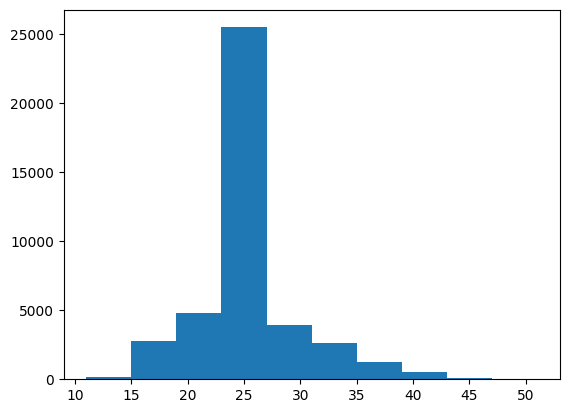

In [12]:
plt.hist(df['AGE'])
plt.show()

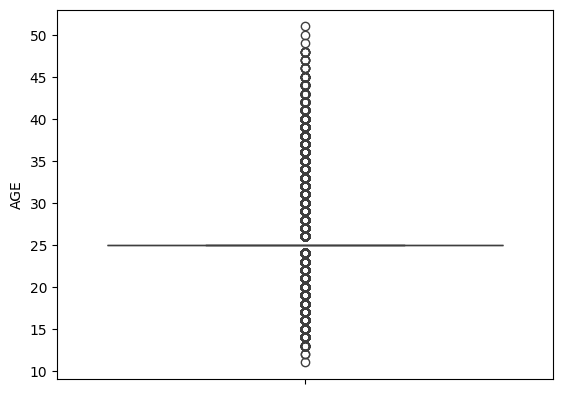

In [13]:
sns.boxplot(df['AGE'])
plt.show()

### verificação de integridade das features categóricas

In [14]:
df.columns.to_list()



['VDRL_RESULT',
 'CONS_ALCOHOL',
 'RH_FACTOR',
 'SMOKER',
 'PLAN_PREGNANCY',
 'BLOOD_GROUP',
 'HAS_PREG_RISK',
 'TET_VACCINE',
 'IS_HEAD_FAMILY',
 'MARITAL_STATUS',
 'FOOD_INSECURITY',
 'NUM_ABORTIONS',
 'NUM_LIV_CHILDREN',
 'NUM_PREGNANCIES',
 'FAM_PLANNING',
 'TYPE_HOUSE',
 'HAS_FAM_INCOME',
 'LEVEL_SCHOOLING',
 'CONN_SEWER_NET',
 'NUM_RES_HOUSEHOLD',
 'HAS_FRU_TREE',
 'HAS_VEG_GARDEN',
 'FAM_INCOME',
 'HOUSING_STATUS',
 'WATER_TREATMENT',
 'AGE']

In [15]:

[print(col) for col in df.columns]

VDRL_RESULT
CONS_ALCOHOL
RH_FACTOR
SMOKER
PLAN_PREGNANCY
BLOOD_GROUP
HAS_PREG_RISK
TET_VACCINE
IS_HEAD_FAMILY
MARITAL_STATUS
FOOD_INSECURITY
NUM_ABORTIONS
NUM_LIV_CHILDREN
NUM_PREGNANCIES
FAM_PLANNING
TYPE_HOUSE
HAS_FAM_INCOME
LEVEL_SCHOOLING
CONN_SEWER_NET
NUM_RES_HOUSEHOLD
HAS_FRU_TREE
HAS_VEG_GARDEN
FAM_INCOME
HOUSING_STATUS
WATER_TREATMENT
AGE


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
df_category = df[['VDRL_RESULT', 'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY',
       'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY',
       'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS',
       'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE',
       'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET',
       'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME',
       'HOUSING_STATUS', 'WATER_TREATMENT']].astype('category')

In [70]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41719 entries, 0 to 41761
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VDRL_RESULT        41719 non-null  category
 1   CONS_ALCOHOL       41719 non-null  category
 2   RH_FACTOR          41719 non-null  category
 3   SMOKER             41719 non-null  category
 4   PLAN_PREGNANCY     41719 non-null  category
 5   BLOOD_GROUP        41719 non-null  category
 6   HAS_PREG_RISK      41719 non-null  category
 7   TET_VACCINE        41719 non-null  category
 8   IS_HEAD_FAMILY     41719 non-null  category
 9   MARITAL_STATUS     41719 non-null  category
 10  FOOD_INSECURITY    41719 non-null  category
 11  NUM_ABORTIONS      41719 non-null  category
 12  NUM_LIV_CHILDREN   41719 non-null  category
 13  NUM_PREGNANCIES    41719 non-null  category
 14  FAM_PLANNING       41719 non-null  category
 15  TYPE_HOUSE         41719 non-null  category
 16  HAS_FAM_I

In [18]:
df_category.describe()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,TYPE_HOUSE,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT
count,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0,41719.0
unique,2.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,6.0,3.0,4.0,5.0,5.0,3.0,6.0,2.0,10.0,3.0,6.0,3.0,3.0,4.0,4.0,5.0
top,1.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,3.0,4.0,1.0,0.0,4.0,0.0,5.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0
freq,40894.0,36323.0,25735.0,37065.0,22863.0,13766.0,34324.0,36689.0,31246.0,17531.0,18120.0,22020.0,19095.0,11513.0,19806.0,37890.0,31228.0,13153.0,23582.0,15384.0,27257.0,31292.0,16555.0,23422.0,22480.0


In [19]:
df_category['LEVEL_SCHOOLING'].value_counts()

,count
LEVEL_SCHOOLING,
5.0,13153
4.0,9210
6.0,6772
2.0,5125
3.0,2513
1.0,1469
7.0,1062
9.0,1041
8.0,847


In [20]:
df.isnull().sum()

,0
VDRL_RESULT,0
CONS_ALCOHOL,0
RH_FACTOR,0
SMOKER,0
PLAN_PREGNANCY,0
BLOOD_GROUP,0
HAS_PREG_RISK,0
TET_VACCINE,0
IS_HEAD_FAMILY,0
MARITAL_STATUS,0


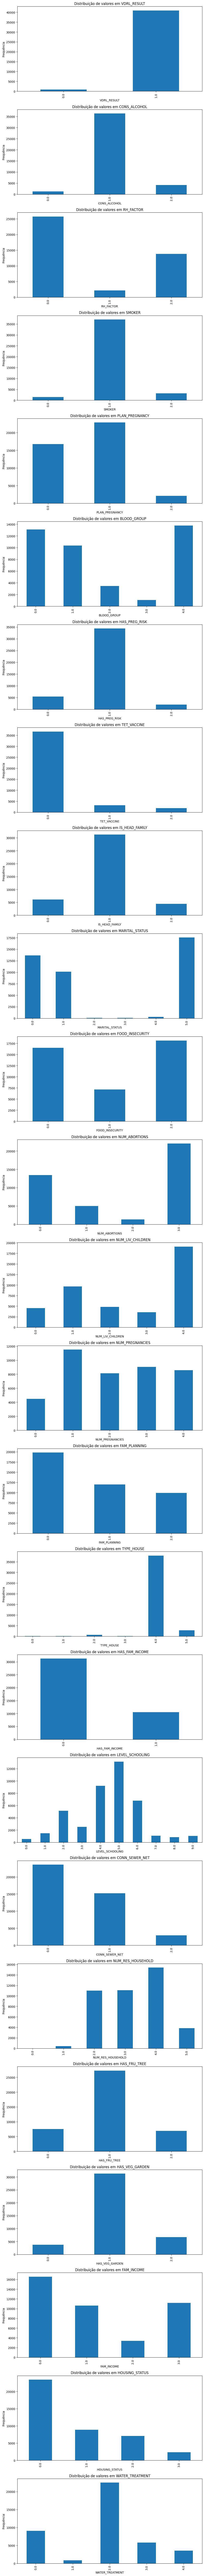

In [21]:
cat_features = df.columns[:-1].to_list()

plt.figure(figsize=(10, 5 * len(cat_features)))

for i, coluna in enumerate(cat_features, 1):
    plt.subplot(len(cat_features), 1, i)
    df[coluna].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribuição de valores em {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



# Sample balancing

Número de positivos: 825
Número de negativos: 825


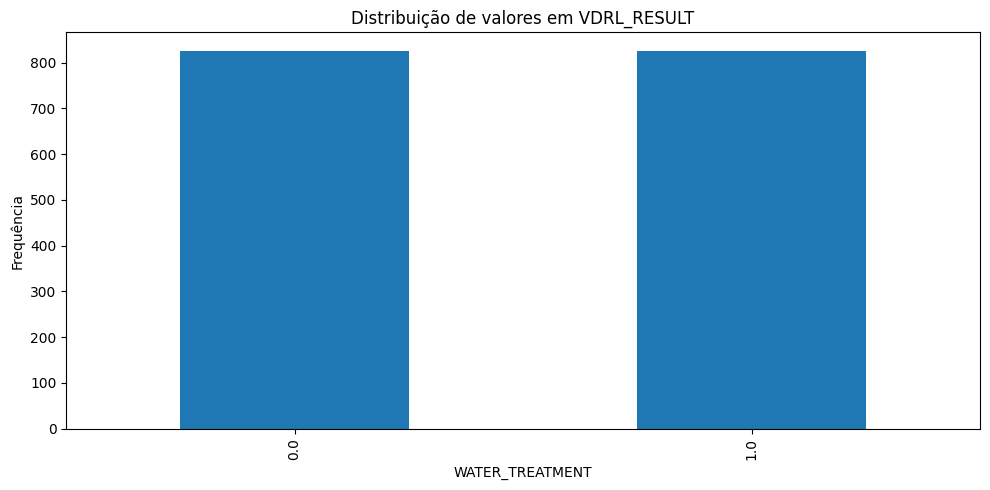

In [22]:
# @title Redução aleatória de sample

positivos = df[df['VDRL_RESULT'] == 1]
negativos = df[df['VDRL_RESULT'] == 0]

n_negativos = len(negativos)
n_positivos = n_negativos

print(f'Número de positivos: {n_positivos}')
print(f'Número de negativos: {n_negativos}')

sub_amostra_positivos = positivos.sample(n=n_positivos, random_state=42)
sub_amostra_negativos = negativos.sample(n=n_negativos, random_state=42)

dataset_reduzido = pd.concat([sub_amostra_positivos, sub_amostra_negativos]).sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(10, 5 ))

dataset_reduzido['VDRL_RESULT'].value_counts().sort_index().plot(kind='bar')
plt.title(f'Distribuição de valores em VDRL_RESULT')
plt.xlabel(coluna)
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()

In [23]:
df_reduzido_health = dataset_reduzido[['VDRL_RESULT','PLAN_PREGNANCY',  'HAS_PREG_RISK', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'LEVEL_SCHOOLING', 'FAM_INCOME', 'AGE']]
df_reduzido_health.head()


,VDRL_RESULT,PLAN_PREGNANCY,HAS_PREG_RISK,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,LEVEL_SCHOOLING,FAM_INCOME,AGE
0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,0.0,6.0,0.0,17.0
1,1.0,1.0,1.0,0.0,2.0,3.0,4.0,4.0,2.0,5.0,2.0,25.0
2,0.0,1.0,1.0,5.0,1.0,0.0,4.0,3.0,0.0,6.0,1.0,22.0
3,1.0,1.0,0.0,5.0,1.0,0.0,2.0,3.0,0.0,4.0,0.0,31.0
4,1.0,1.0,0.0,5.0,1.0,2.0,4.0,3.0,2.0,4.0,3.0,33.0


In [24]:
# Lista de colunas para transformar em categóricas (exceto 'AGE')
colunas_categoricas = df_reduzido_health.columns.difference(['AGE'])

for coluna in colunas_categoricas:
    df_reduzido_health[coluna] = df_reduzido_health[coluna].astype('category')

print(df_reduzido_health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   VDRL_RESULT       1650 non-null   category
 1   PLAN_PREGNANCY    1650 non-null   category
 2   HAS_PREG_RISK     1650 non-null   category
 3   MARITAL_STATUS    1650 non-null   category
 4   FOOD_INSECURITY   1650 non-null   category
 5   NUM_ABORTIONS     1650 non-null   category
 6   NUM_LIV_CHILDREN  1650 non-null   category
 7   NUM_PREGNANCIES   1650 non-null   category
 8   FAM_PLANNING      1650 non-null   category
 9   LEVEL_SCHOOLING   1650 non-null   category
 10  FAM_INCOME        1650 non-null   category
 11  AGE               1650 non-null   float64 
dtypes: category(11), float64(1)
memory usage: 32.8 KB
None


<ipython-input-24-97ece8e9f426>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduzido_health[coluna] = df_reduzido_health[coluna].astype('category')


In [25]:
df_reduzido_health['AGE'].describe(), len(df_reduzido_health)

(count    1650.000000
 mean       25.158788
 std         4.578961
 min        13.000000
 25%        24.000000
 50%        25.000000
 75%        25.000000
 max        48.000000
 Name: AGE, dtype: float64,
 1650)

#Classificação

In [48]:
#@title SVC + One Hot Encoding

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X = df_reduzido_health.drop('VDRL_RESULT', axis=1)
y = df_reduzido_health['VDRL_RESULT']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(random_state=42, probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs= -1)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Melhores parâmetros: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Acurácia: 0.6222222222222222
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.59      0.76      0.66       240
         1.0       0.68      0.49      0.57       255

    accuracy                           0.62       495
   macro avg       0.63      0.63      0.62       495
weighted avg       0.64      0.62      0.62       495



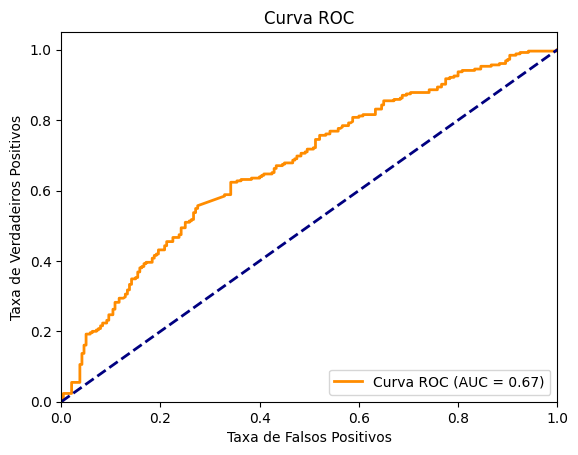

In [49]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [43]:
#@title Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df_reduzido_health.drop('VDRL_RESULT', axis=1)
y = df_reduzido_health['VDRL_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]

}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='recall', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Melhores parâmetros: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}
Acurácia: 0.602020202020202
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.58      0.65      0.61       240
         1.0       0.63      0.56      0.59       255

    accuracy                           0.60       495
   macro avg       0.60      0.60      0.60       495
weighted avg       0.60      0.60      0.60       495



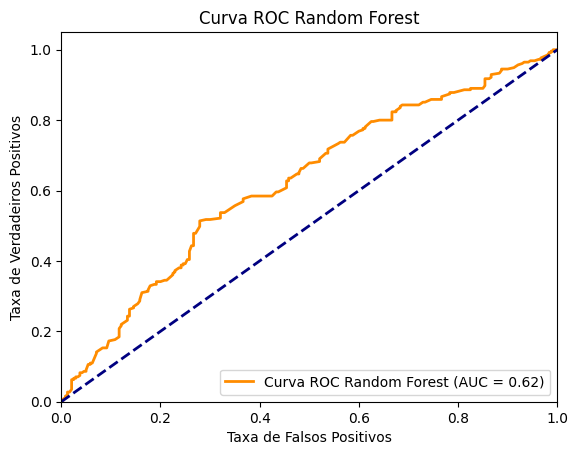

In [44]:
y_pred_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Random Forest')
plt.legend(loc="lower right")
plt.show()


In [99]:
#@title AdaBoost + One Hot Encoding

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df_reduzido_health.drop('VDRL_RESULT', axis=1)
y = df_reduzido_health['VDRL_RESULT']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier())

param_grid_ada = {
    'n_estimators': [100, 110, 120, 200],
    'learning_rate': [0.01, 0.3, 0.4, 0.5],
    'estimator__max_depth': [1, 2, 3]
   # 'loss': ['linear', 'square', 'exponential'],
}

grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=10, scoring='recall', n_jobs=-1)

grid_search_ada.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search_ada.best_params_)

y_pred_ada = grid_search_ada.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred_ada))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Melhores parâmetros: {'estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 110}
Acurácia: 0.6212121212121212
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.63      0.59      0.61       165
         1.0       0.61      0.65      0.63       165

    accuracy                           0.62       330
   macro avg       0.62      0.62      0.62       330
weighted avg       0.62      0.62      0.62       330



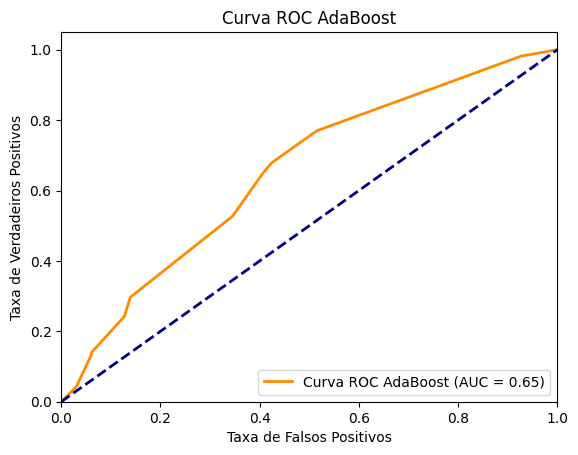

In [100]:
y_pred_proba_ada = grid_search_ada.predict_proba(X_test)[:, 1]

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada)

roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure()
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label='Curva ROC AdaBoost (AUC = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC AdaBoost')
plt.legend(loc="lower right")
plt.show()

In [102]:
#@title KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

df_numerical = df_reduzido_health.copy()
for column in df_numerical.columns:
  if df_numerical[column].dtype == 'category':
    df_numerical[column] = df_numerical[column].cat.codes

X = df_numerical.drop('VDRL_RESULT', axis=1)
y = df_numerical['VDRL_RESULT']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.50       165
           1       0.52      0.56      0.54       165

    accuracy                           0.52       330
   macro avg       0.52      0.52      0.52       330
weighted avg       0.52      0.52      0.52       330



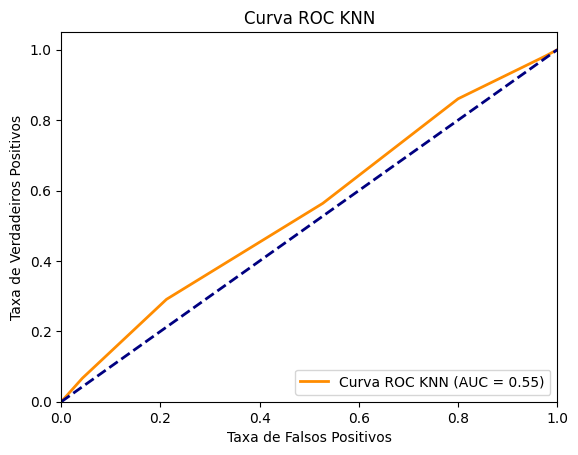

In [104]:
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='Curva ROC KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC KNN')
plt.legend(loc="lower right")
plt.show()

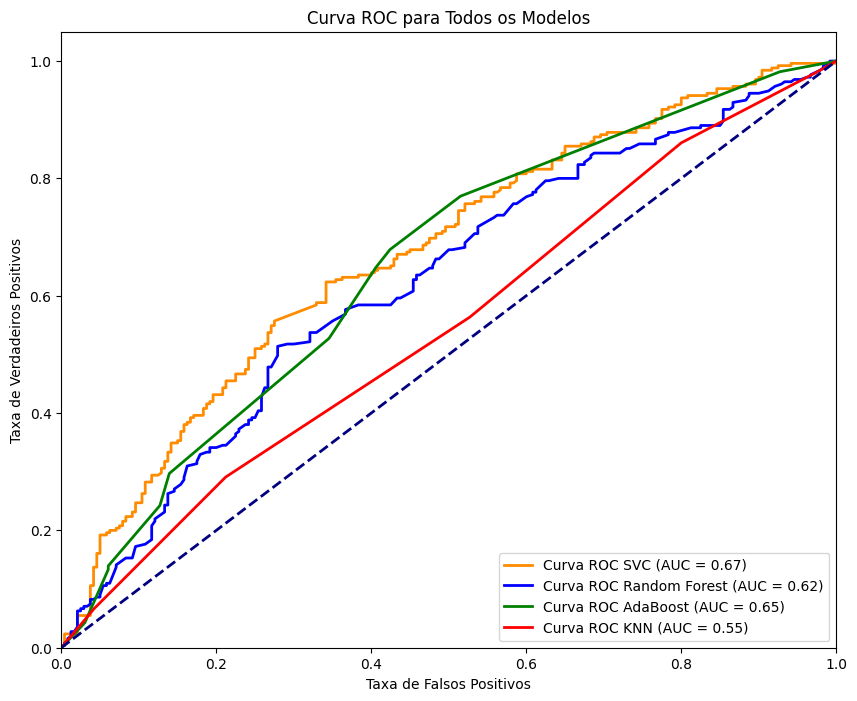

In [106]:
#@title ROC sumário

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC SVC (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Curva ROC Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, label='Curva ROC AdaBoost (AUC = %0.2f)' % roc_auc_ada)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='Curva ROC KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Todos os Modelos')
plt.legend(loc="lower right")
plt.show()

#Regressão

In [92]:
# Voltamos a utilizar o dataset por completo
# transformando colunas em tipo categorico

colunas_categoricas = df.columns.difference(['AGE'])

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41719 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VDRL_RESULT        41719 non-null  category
 1   CONS_ALCOHOL       41719 non-null  category
 2   RH_FACTOR          41719 non-null  category
 3   SMOKER             41719 non-null  category
 4   PLAN_PREGNANCY     41719 non-null  category
 5   BLOOD_GROUP        41719 non-null  category
 6   HAS_PREG_RISK      41719 non-null  category
 7   TET_VACCINE        41719 non-null  category
 8   IS_HEAD_FAMILY     41719 non-null  category
 9   MARITAL_STATUS     41719 non-null  category
 10  FOOD_INSECURITY    41719 non-null  category
 11  NUM_ABORTIONS      41719 non-null  category
 12  NUM_LIV_CHILDREN   41719 non-null  category
 13  NUM_PREGNANCIES    41719 non-null  category
 14  FAM_PLANNING       41719 non-null  category
 15  TYPE_HOUSE         41719 non-null  category
 16  HAS_FAM_I

In [95]:
df['AGE'].describe()

,AGE
count,41719.000000
mean,25.216808
std,4.496175
min,11.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,51.000000


In [94]:
df_age_cut = df.copy()
df_age_cut = df_age_cut[df_age_cut['AGE'] <= 45 ]

df_age_cut['AGE'].describe()

,AGE
count,41701.000000
mean,25.207165
std,4.473029
min,11.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,45.000000


In [97]:
df['AGE'].describe()

,AGE
count,41719.000000
mean,25.216808
std,4.496175
min,11.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,51.000000


In [96]:
# Remoção e outliers de idade
df_sem_outliers = df.copy()

Q1 = df_sem_outliers['AGE'].quantile(0.25)
Q3 = df_sem_outliers['AGE'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df_sem_outliers[(df_sem_outliers['AGE'] >= limite_inferior) & (df_sem_outliers['AGE'] <= limite_superior)]

df_sem_outliers['AGE'].describe()

,AGE
count,22017.0
mean,25.0
std,0.0
min,25.0
25%,25.0
50%,25.0
75%,25.0
max,25.0


In [107]:
#@title Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


df_age_cut = df.copy()
df_age_cut = df_age_cut[df_age_cut['AGE'] <= 45 ]

dfs = [df.copy(), df_age_cut.copy(), df_sem_outliers.copy()]

for df in dfs:
  X = df.drop('AGE', axis=1)
  y = df['AGE']

  X = pd.get_dummies(X, drop_first=True)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  ridge_model = Ridge(alpha=1.0)  # Alpha é o parâmetro de regularização

  ridge_model.fit(X_train, y_train)

  y_pred = ridge_model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mape = mean_absolute_percentage_error(y_test, y_pred)

  print(f"MAE: {mae}")
  print(f"RMSE: {rmse}")
  print(f"MAPE: {mape}\n")

MAE: 2.9444534932155046
RMSE: 4.171818503995273
MAPE: 0.1202170343173047

MAE: 2.9119439119825112
RMSE: 4.13122898908341
MAPE: 0.11981695763410805

MAE: 0.0
RMSE: 0.0
MAPE: 0.0



In [33]:
df_cut = df.copy()



Q1 = df_cut['AGE'].quantile(0.25)
Q3 = df_cut['AGE'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df_cut['AGE'] < Q1 - 1.5 * IQR) | (df_cut['AGE'] > Q3 + 1.5 * IQR)
df_cut = df_cut[~outliers]

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: MAE = {-scores.mean():.2f} ± {scores.std():.2f}")



Ridge: MAE = 2.96 ± 0.03
Lasso: MAE = 2.95 ± 0.03
RandomForest: MAE = 2.92 ± 0.02
GradientBoosting: MAE = 2.89 ± 0.03


#Balanceamento com SMOTEENN

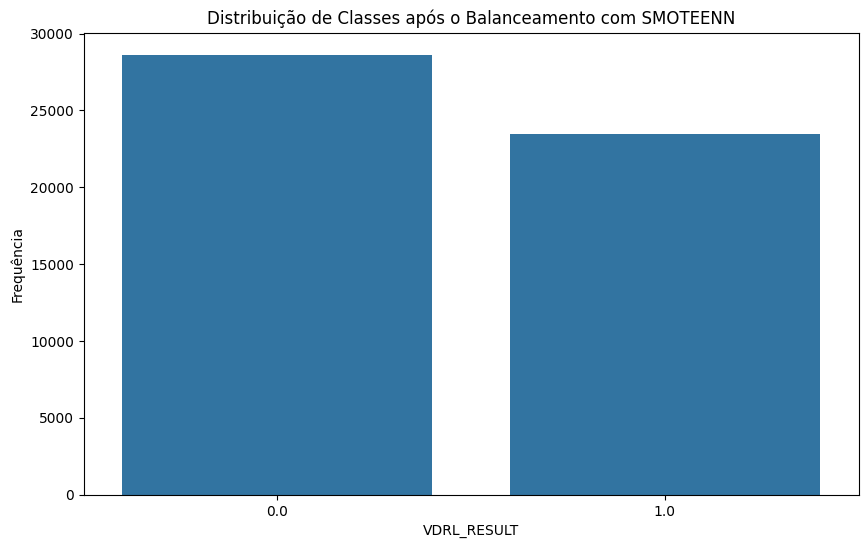

In [34]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

target_column = 'VDRL_RESULT'

X = df.drop(target_column, axis=1)
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title('Distribuição de Classes após o Balanceamento com SMOTEENN')
plt.xlabel(target_column)
plt.ylabel('Frequência')
plt.show()


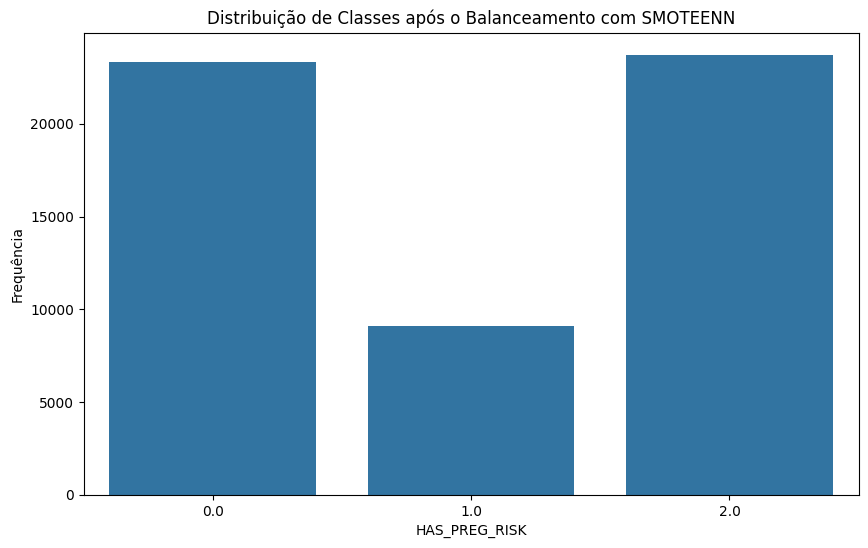

In [35]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

target_column = 'HAS_PREG_RISK'

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title('Distribuição de Classes após o Balanceamento com SMOTEENN')
plt.xlabel(target_column)
plt.ylabel('Frequência')
plt.show()
